In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wandb
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

ModuleNotFoundError: No module named 'wandb'

In [ ]:
# Initialize WandB
wandb.init(project="multivariate_regression", name="baseline_model")

wandb: Currently logged in as: mdakeel8810 (mdakeel8810-techyhunt) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [ ]:
df = pd.read_csv('Filtered_data.csv')

In [ ]:
df.head()

,F1 (400nm),F2 (424nm),FZ (450nm),F3 (473nm),F4 (514nm),FY (555nm),F5 (547nm),FXL (595nm),F6 (635nm),F7 (685nm),F8 (745nm),Fat(gm),calories(gm)
0,145,205,864,970,3302,2376,877,1039,593,536,94,3.58,63.98
1,145,205,863,970,3302,2376,877,1039,593,536,94,3.47,63.11
2,145,205,863,969,3300,2376,877,1039,593,536,94,3.51,61.51
3,145,205,863,970,3302,2377,877,1039,593,536,94,3.40,62.12
4,145,205,863,970,3300,2374,877,1039,593,536,94,3.54,62.66


In [ ]:
df = df.drop(columns=['calories(gm)'])

In [ ]:
df.sample(5)

,F1 (400nm),F2 (424nm),FZ (450nm),F3 (473nm),F4 (514nm),FY (555nm),F5 (547nm),FXL (595nm),F6 (635nm),F7 (685nm),F8 (745nm),Fat(gm)
6,145,205,864,971,3301,2377,877,1039,593,537,94,3.13
40,311,504,1266,1182,3337,5948,1555,6503,7755,5526,689,3.49
30,1646,2121,4950,4238,6396,8175,2308,7291,7564,4775,548,2.73
72,280,494,1371,1291,2201,3148,868,3056,3461,2361,295,3.30
51,205,285,443,426,442,3090,198,5970,9745,5613,562,4.21


In [ ]:
print(df.isnull().sum())

F1 (400nm)     0
F2 (424nm)     0
FZ (450nm)     0
F3 (473nm)     0
F4 (514nm)     0
FY (555nm)     0
F5 (547nm)     0
FXL (595nm)    0
F6 (635nm)     0
F7 (685nm)     0
F8 (745nm)     0
Fat(gm)        0
dtype: int64


In [ ]:
print(df.duplicated().sum())

0


#Univariate analysis

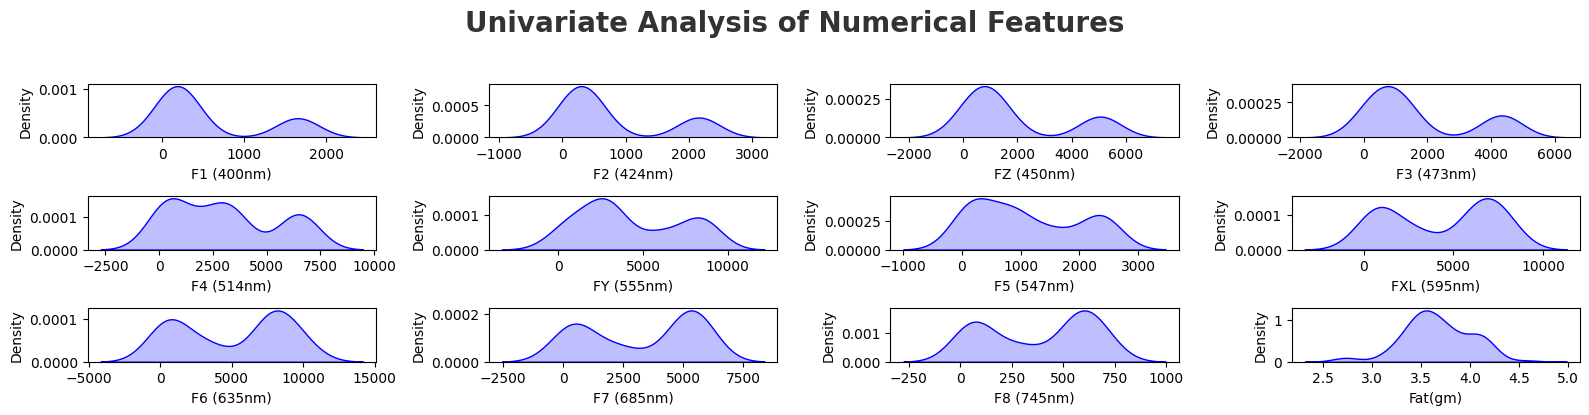

In [ ]:

plt.figure(figsize=(16, 8))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.02)

for i in range(len(df.columns)):
    plt.subplot(7, 4, i+1)  # Adjust rows/cols based on number of features
    col = df.columns[i]
    sns.kdeplot(x=df[col], color='blue', fill=True)
    plt.xlabel(col)
    plt.tight_layout()

    wandb.log({f"Histogram_{col}": wandb.Image(plt)})


In [ ]:
X = df.drop(columns=['Fat(gm)'])
y = df['Fat(gm)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("MSE : ", mse)
print("R2 : ", r2)

wandb.log({
    "MSE": mse,
    "R2": r2,
})

MSE :  0.16568446772280845
R2 :  -0.12054204775301436


In [ ]:
wandb.log({
    "Dataset Shape": df.shape,
    "Feature Names": list(X.columns),
    "Target Name": "Fat(gm)"
})

### Multicollinearity Check : VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

vif_df = pd.DataFrame()
vif_df['Feature'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

vif_df.sort_values(by='VIF', ascending=False)


,Feature,VIF
9,F7 (685nm),1.658767e+06
8,F6 (635nm),1.330006e+06
7,FXL (595nm),8.895548e+05
5,FY (555nm),5.971658e+05
10,F8 (745nm),3.604533e+05
2,FZ (450nm),3.317617e+05
1,F2 (424nm),1.752014e+05
6,F5 (547nm),1.543944e+05
3,F3 (473nm),1.320676e+05
4,F4 (514nm),7.365716e+04


In [ ]:
wandb.log({"VIF_Table": wandb.Table(dataframe=vif_df)})

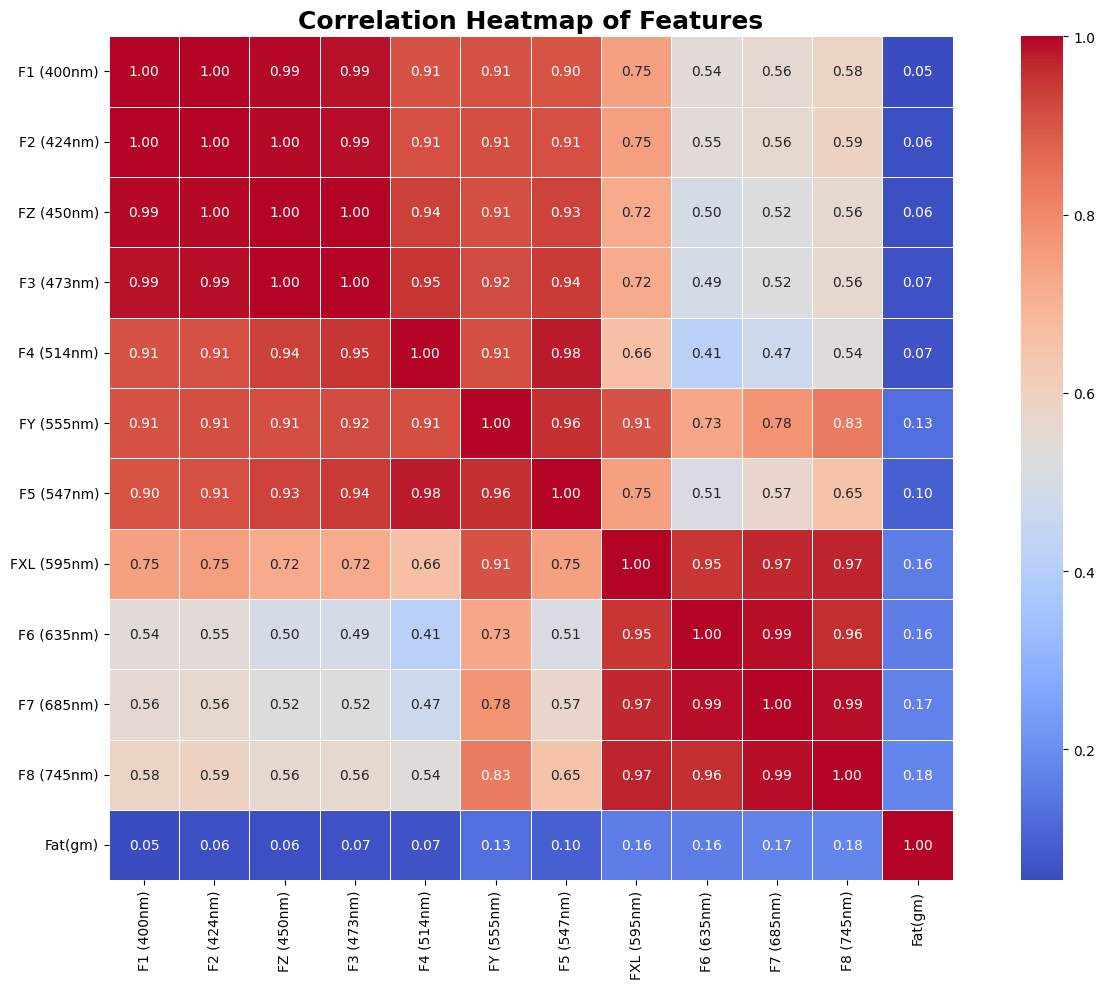

In [ ]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Features", fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
wandb.log({"Correlation_Heatmap": wandb.Image(plt)})

<Figure size 640x480 with 0 Axes>

# Boxplot Visualization

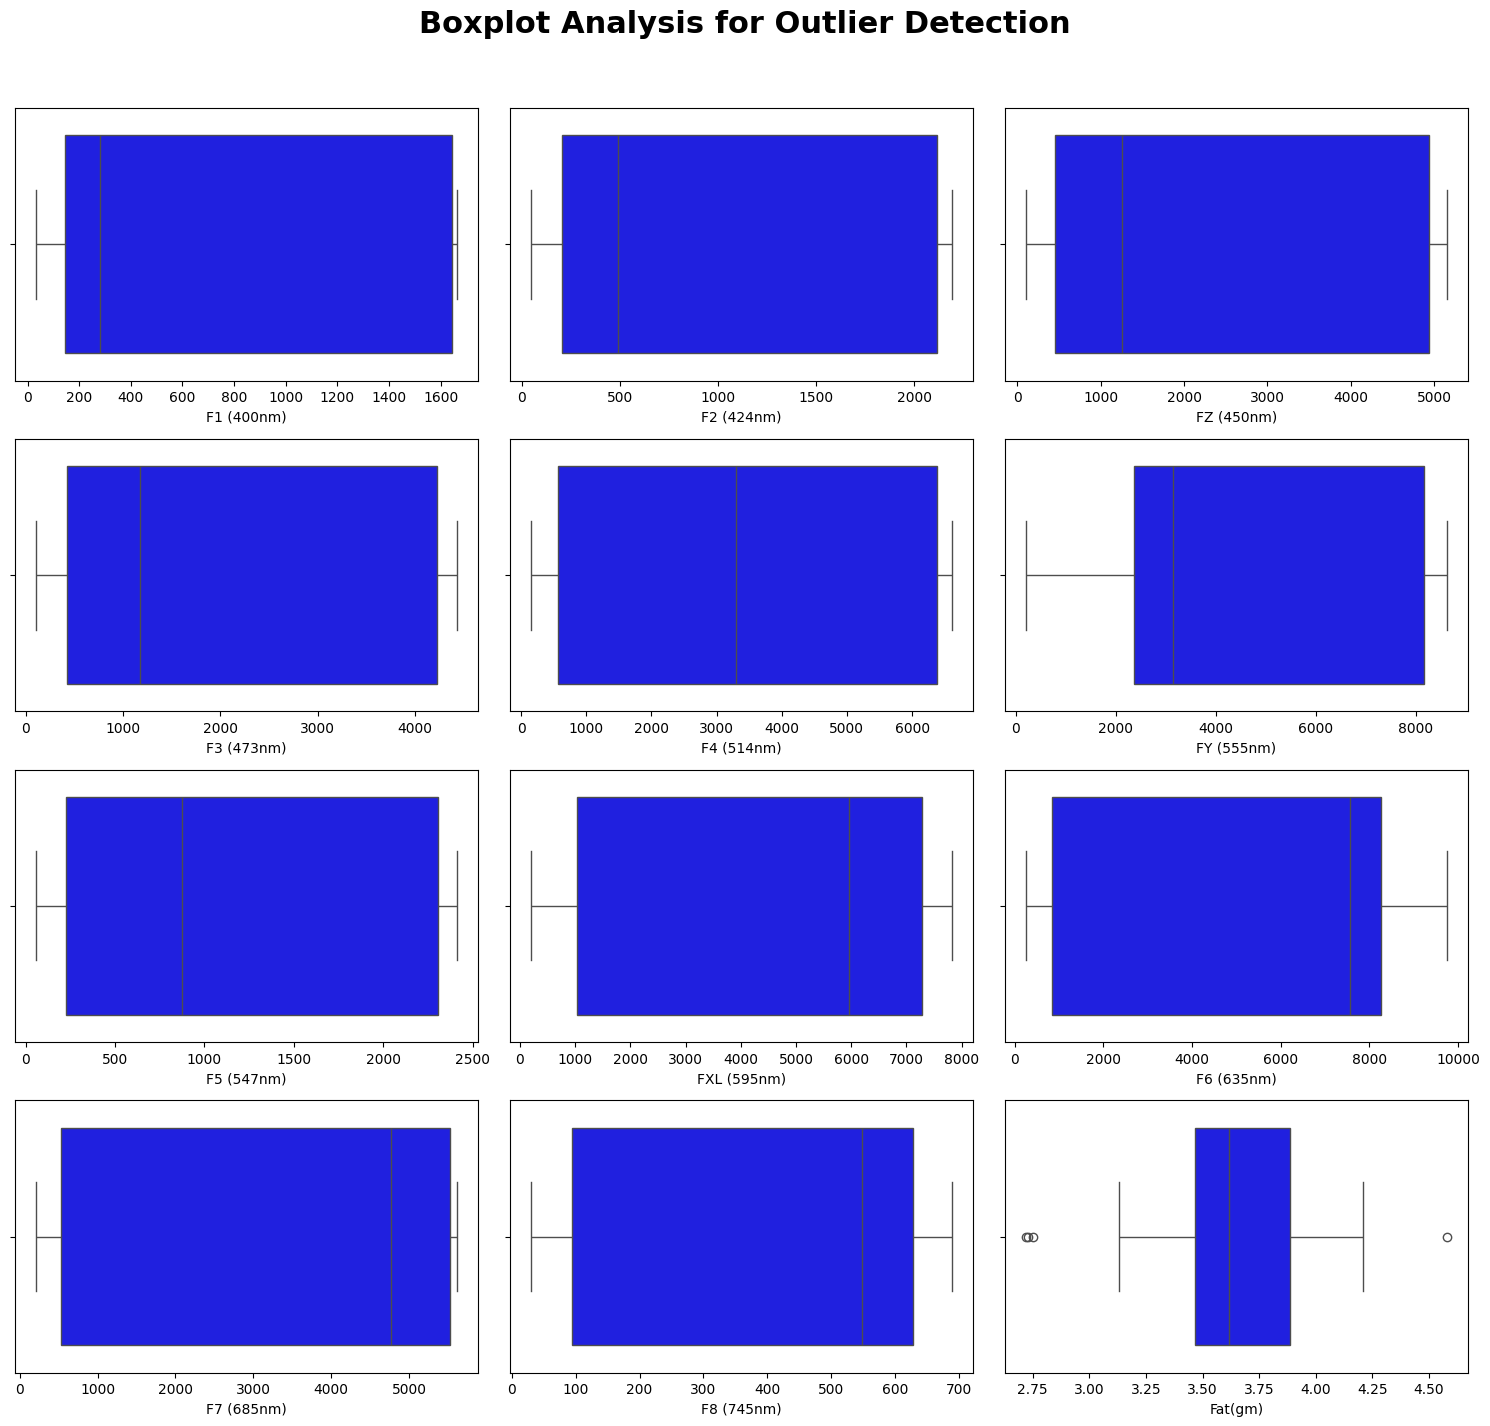

In [ ]:
# Plot boxplots in grid
plt.figure(figsize=(15, 20))
plt.suptitle("Boxplot Analysis for Outlier Detection", fontsize=22, fontweight='bold', y=1.02)

for i, col in enumerate(df):
    plt.subplot(6, 3, i+1)
    sns.boxplot(x=df[col], color='blue')
    plt.xlabel(col)
    plt.tight_layout()

In [ ]:
wandb.sklearn.plot_outlier_candidates(model, X_train, y_train)

In [ ]:
wandb.log({f"Boxplot_{col}": wandb.Image(plt)})

<Figure size 640x480 with 0 Axes>

# Removing Outlier from Fat(gm) : Using IQR

In [ ]:
# Calculate IQR bounds
Q1 = df["Fat(gm)"].quantile(0.25)
Q3 = df["Fat(gm)"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_clean = df[(df["Fat(gm)"] >= lower_bound) & (df["Fat(gm)"] <= upper_bound)]

# Show shape before and after
print("Original shape:", df.shape)
print("Cleaned shape:", df_clean.shape)


Original shape: (96, 12)
Cleaned shape: (92, 12)


In [ ]:
wandb.log({"Cleaned_Data_Shape": {
    "Original": df.shape[0],
    "After_Removal": df_clean.shape[0]
}})

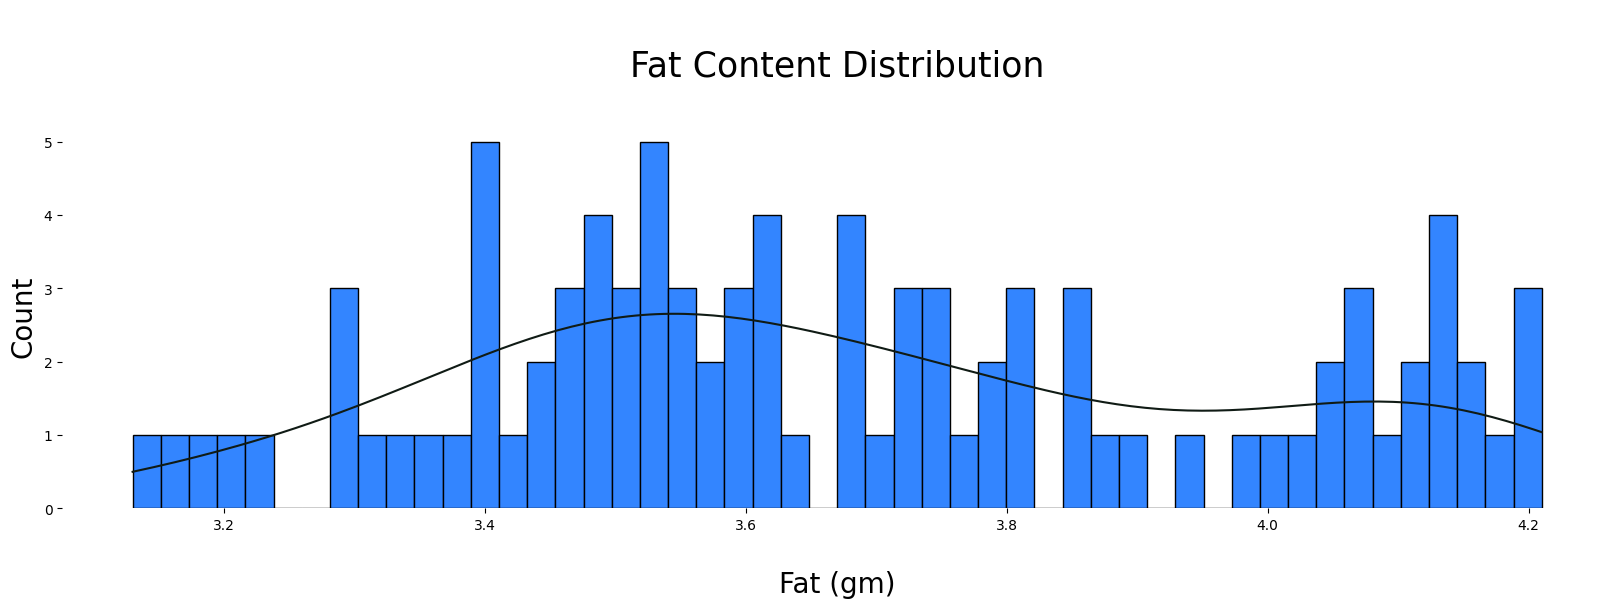

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(20, 5))
plt.title("Let's have a look at the distribution of Fat content (gm):", weight="bold", fontsize=20, pad=20)

p = sns.histplot(df_clean["Fat(gm)"], color="#3385ff", kde=True, bins=50, alpha=1, fill=True, edgecolor="black")
p.axes.lines[0].set_color("#101B15")
p.axes.set_title("\nFat Content Distribution\n", fontsize=25)
plt.ylabel("Count", fontsize=20)
plt.xlabel("\nFat (gm)", fontsize=20)
sns.despine(left=True, bottom=True)

In [ ]:
wandb.log({"Fat_Distribution": wandb.Image(p.figure)})

In [ ]:
X = df_clean.drop(columns=['Fat(gm)'])
y = df_clean['Fat(gm)']

In [ ]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((73, 11), (19, 11), (73,), (19,))

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
wandb.log({
    "Train Size": len(X_train),
    "Test Size": len(X_test),
    "Features": list(X.columns)
})

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("MSE : ", mse)
print("R2 : ", r2)

wandb.log({
    "MSE": mse,
    "R2": r2,
})


MSE :  0.06757979076857357
R2 :  -0.13187950465602571


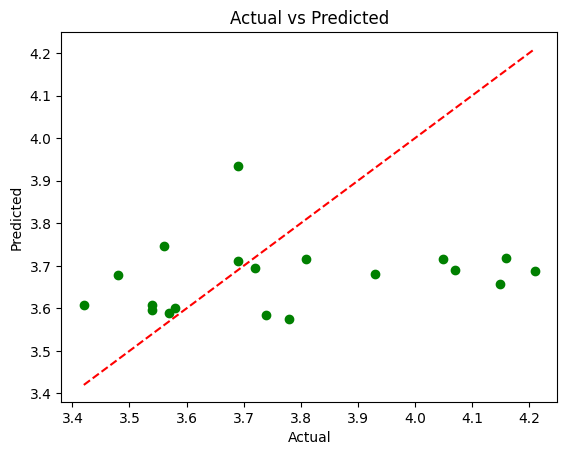

In [ ]:
plt.scatter(y_test, y_pred, color='green')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.show()


In [ ]:
wandb.log({"Actual vs Predicted": wandb.Image(plt)})

<Figure size 640x480 with 0 Axes>

# Residual = Actual − Predicted

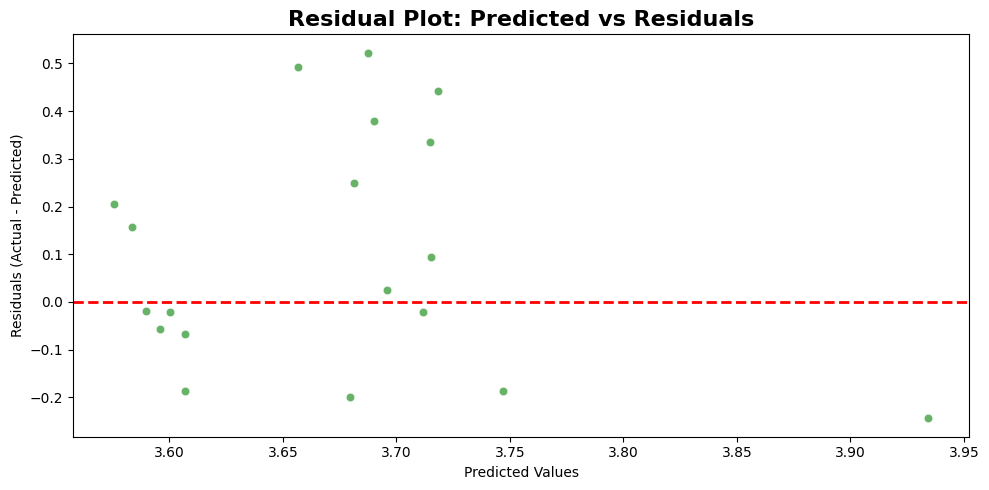

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_pred, y=residuals, color='green', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title("Residual Plot: Predicted vs Residuals", fontsize=16, weight='bold')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.tight_layout()
plt.show()

In [ ]:
wandb.init(project="fat-prediction", name="residuals-plot")
wandb.sklearn.plot_residuals(model, X_train_scaled, y_train)

MSE,█▁
R2,█▁
Test Size,▁
Train Size,▁
MSE,0.06758
R2,-0.13188
Target Name,Fat(gm)
Test Size,19
Train Size,73


In [ ]:
wandb.log({"Correlation Heatmap": wandb.Image(plt)})

<Figure size 640x480 with 0 Axes>

In [ ]:
pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [8.01597390e-01 1.74694805e-01 2.13522992e-02 1.86351331e-03
 3.29544411e-04 1.43591436e-04]


In [ ]:
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)

LinearRegression()

In [ ]:
y_pred = model_pca.predict(X_test_pca)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("MSE : ", mse)
print("R2 : ", r2)

wandb.log({
    "MSE": mse,
    "R2": r2,
})


MSE :  0.059506234189597565
R2 :  0.003342772854684095


In [ ]:
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)
wandb.sklearn.plot_regressor(model_pca, X_train_pca, X_test_pca, y_train, y_test, model_name='Regression with PCA')


wandb: 
wandb: Plotting Regression with PCA.
wandb: Logged summary metrics.
wandb: Logged learning curve.
wandb: Logged outlier candidates.
wandb: Logged residuals.


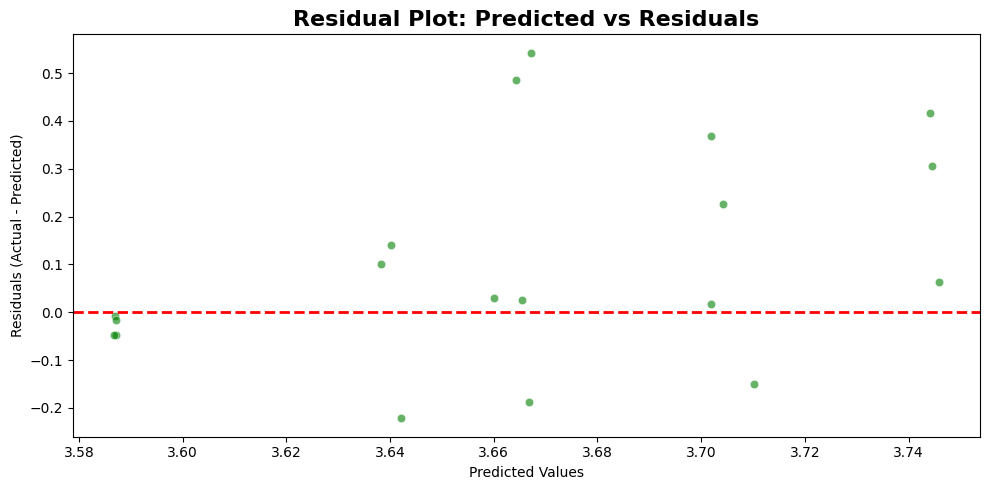

In [ ]:
#Homoscedasticity

residuals = y_test - y_pred

plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_pred, y=residuals, color='green', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title("Residual Plot: Predicted vs Residuals", fontsize=16, weight='bold')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.tight_layout()
plt.show()

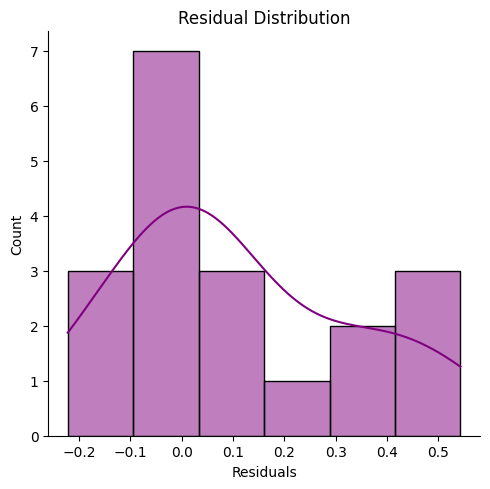

In [ ]:
#Normality

sns.displot(residuals, kde=True, color='purple')
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.tight_layout()
plt.show()

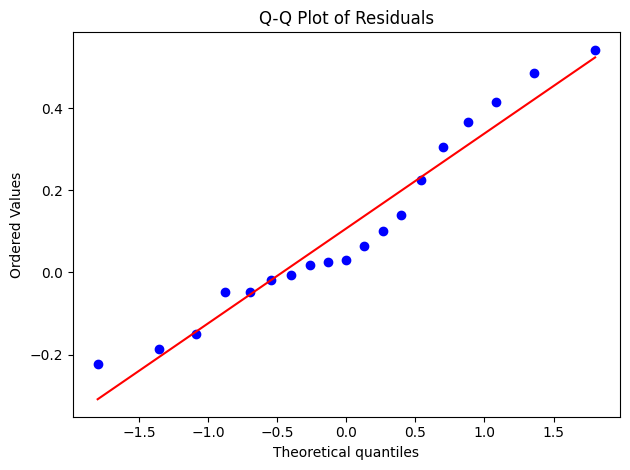

In [ ]:
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.tight_layout()
plt.show()

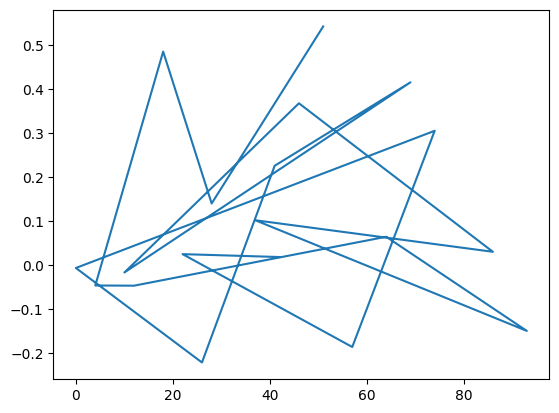

In [ ]:
#Autocorrelation

plt.plot(residuals)

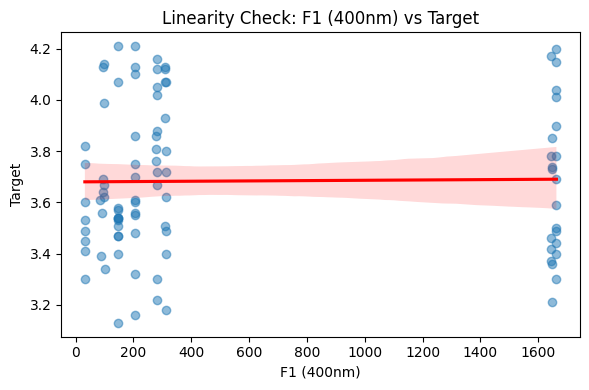

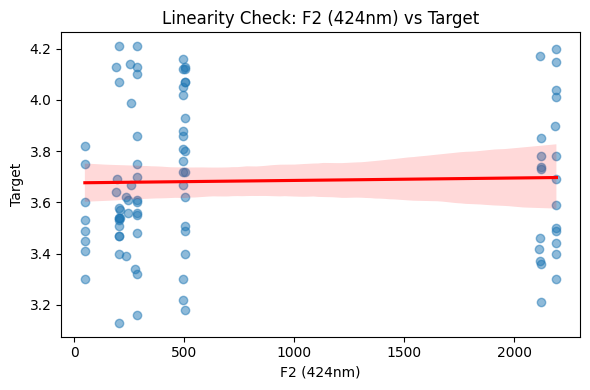

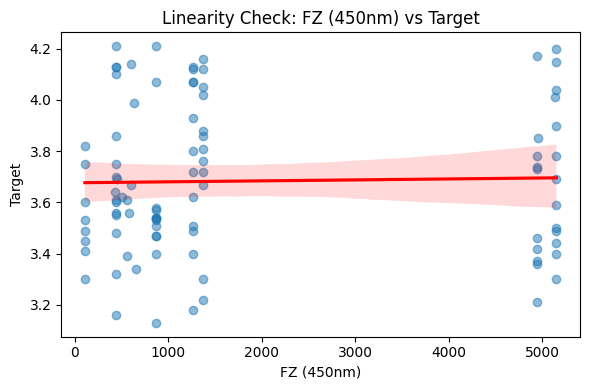

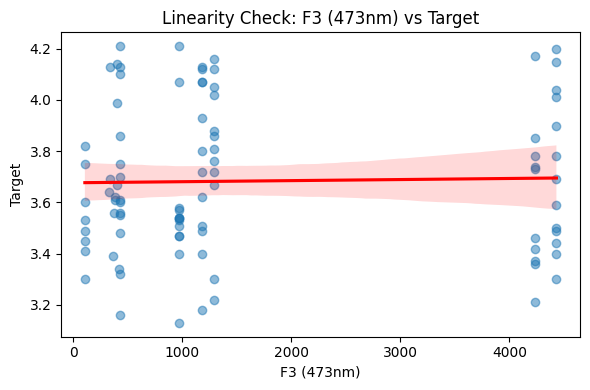

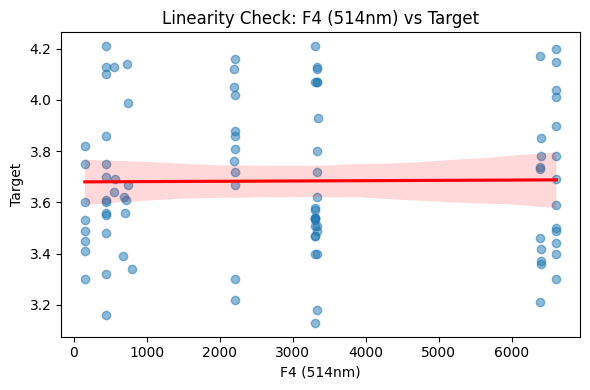

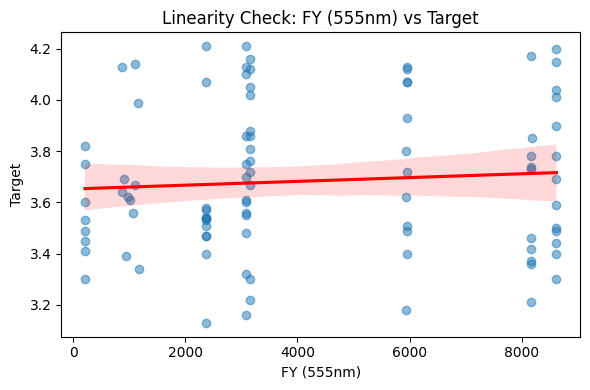

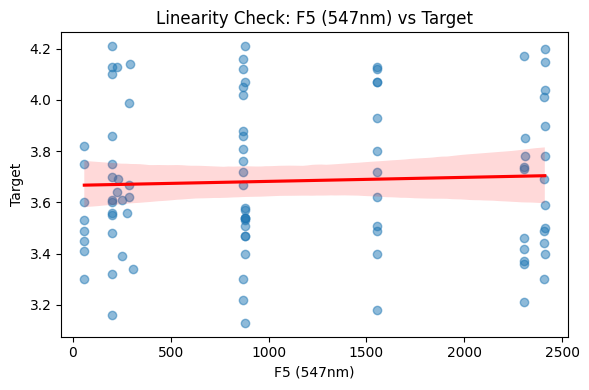

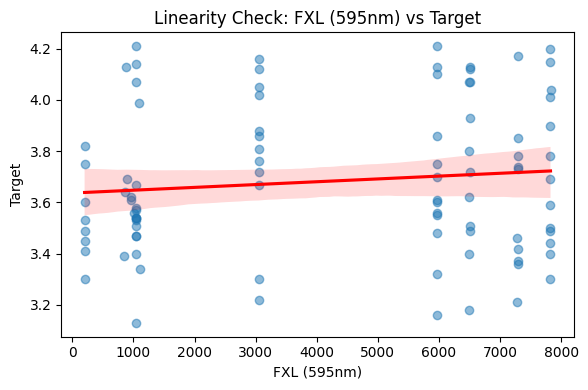

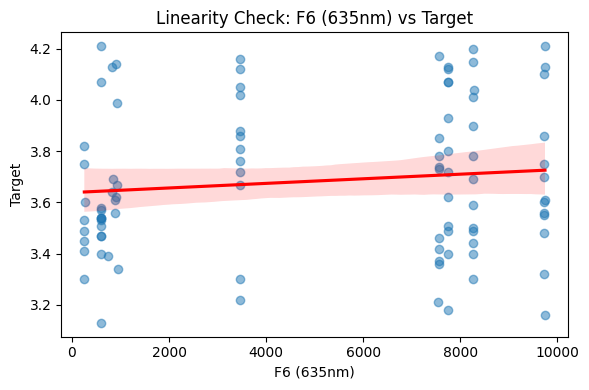

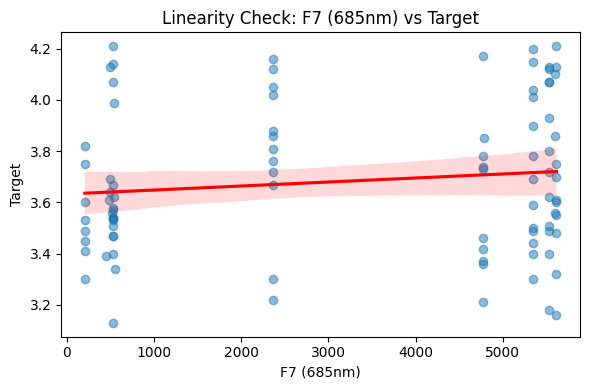

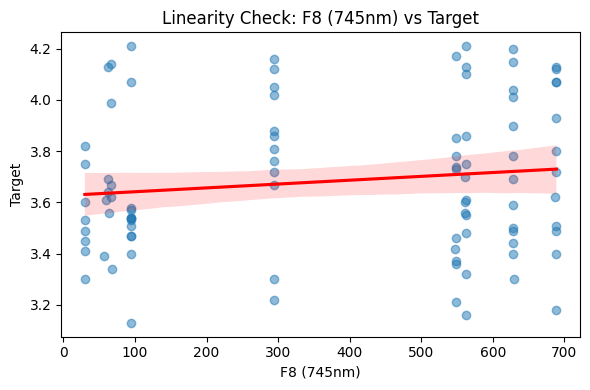

In [ ]:
# Linearity

for col in X.columns:
    plt.figure(figsize=(6, 4))
    sns.regplot(x=X[col], y=y, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f"Linearity Check: {col} vs Target")
    plt.xlabel(col)
    plt.ylabel("Target")
    plt.tight_layout()
    plt.show()


In [ ]:
wandb.init(project="fat-prediction", name="after_pca_residuals-plot")
wandb.sklearn.plot_residuals(model_pca, X_train_scaled, y_train)

Explained Variance,▁
MSE,▁▁
PCA Components,▁
R2,▁
R2 Score,▁
Explained Variance,0.99998
MSE,0.05951
PCA Components,6
R2,0.00334
R2 Score,0.00334


In [ ]:
wandb.log({
    "MSE": mse,
    "R2 Score": r2,
    "PCA Components": 6,
    "Explained Variance": sum(pca.explained_variance_ratio_)
})

In [ ]:
wandb.init(project="fat-prediction", name="Visualize-sklearn")

Explained Variance,▁
MSE,▁
PCA Components,▁
R2 Score,▁
Explained Variance,0.99998
MSE,0.05951
PCA Components,6
R2 Score,0.00334


In [ ]:
wandb.sklearn.plot_outlier_candidates(model, X, y)

In [ ]:
wandb.finish()